In [1]:
!pip install eli5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cirrhosis.csv"
)

In [4]:
# Viewing data in the file
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
# checking if the any data is missing
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [6]:
# Replacing categorical data with mode
for column in ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Replacing numerical data with mean or median
for column in ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']:
    # Check if the distribution is skewed
    if data[column].skew() > 1 or data[column].skew() < -1:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)
    else:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)

data.to_csv('cleaned_data_cirrhosis.csv', index=False)

In [7]:
# Reading the cleaning dataset
cl_data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cleaned_data_cirrhosis.csv"
)

In [8]:
# Viewing data
cl_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [9]:
# checking if the any data is missing
cl_data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

<Figure size 800x500 with 0 Axes>

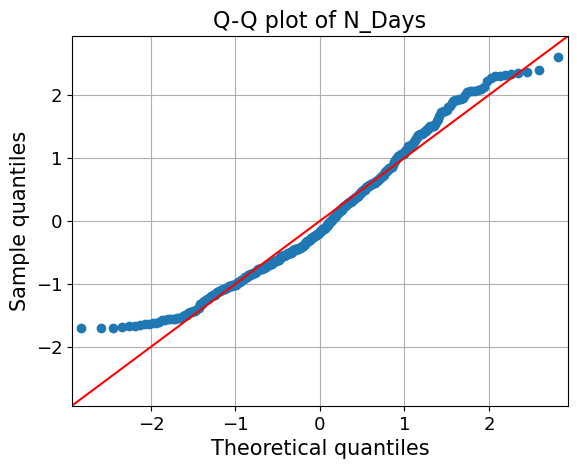

<Figure size 800x500 with 0 Axes>

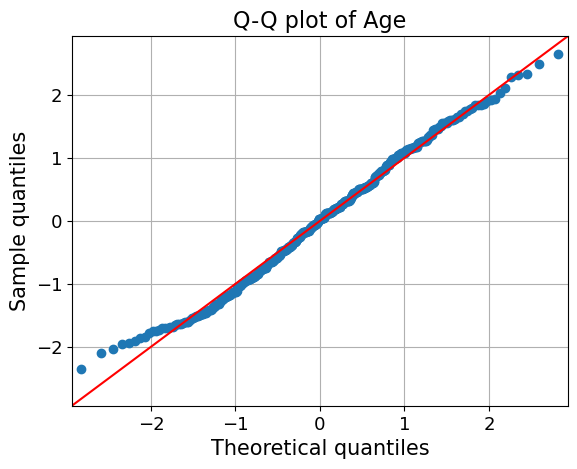

<Figure size 800x500 with 0 Axes>

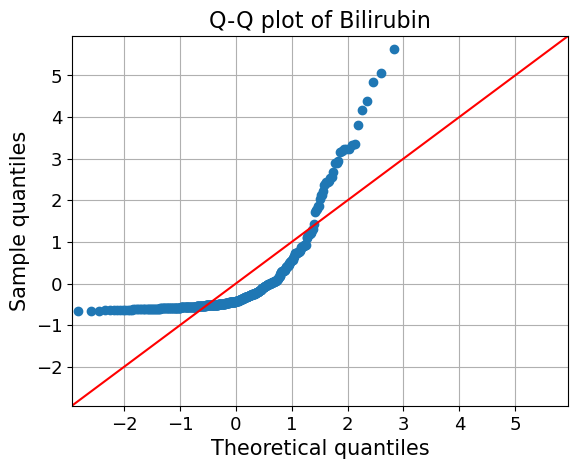

<Figure size 800x500 with 0 Axes>

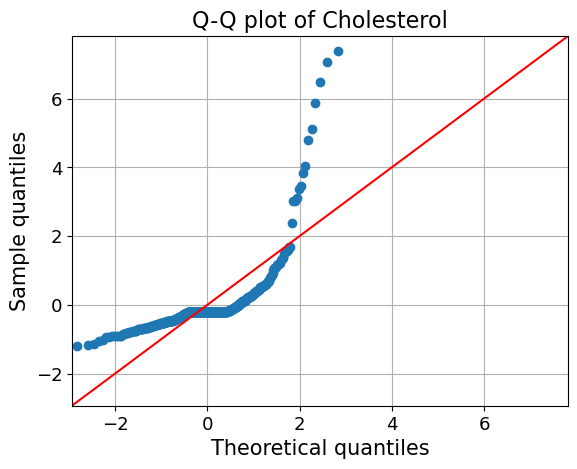

<Figure size 800x500 with 0 Axes>

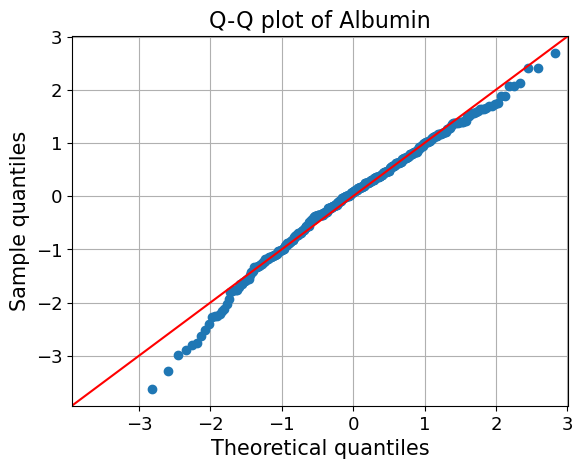

<Figure size 800x500 with 0 Axes>

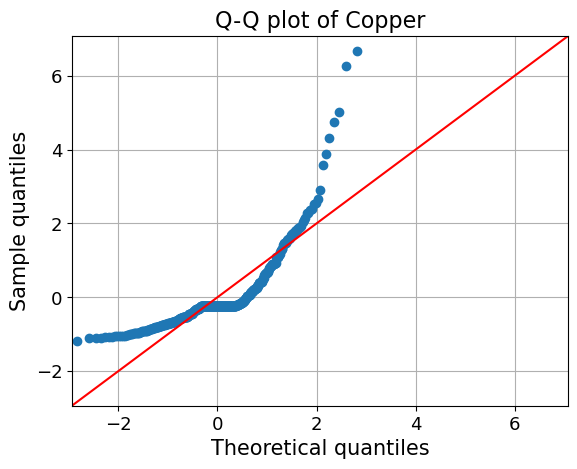

<Figure size 800x500 with 0 Axes>

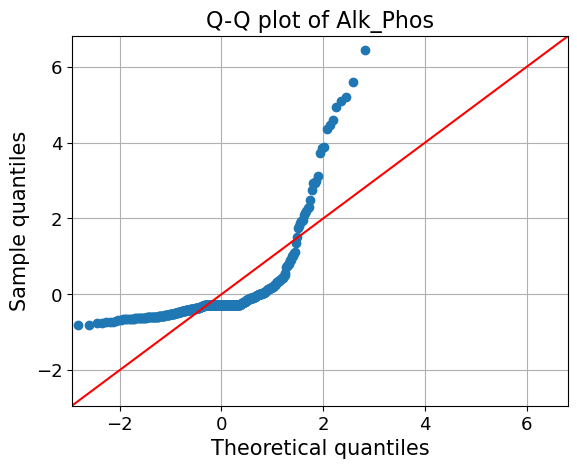

<Figure size 800x500 with 0 Axes>

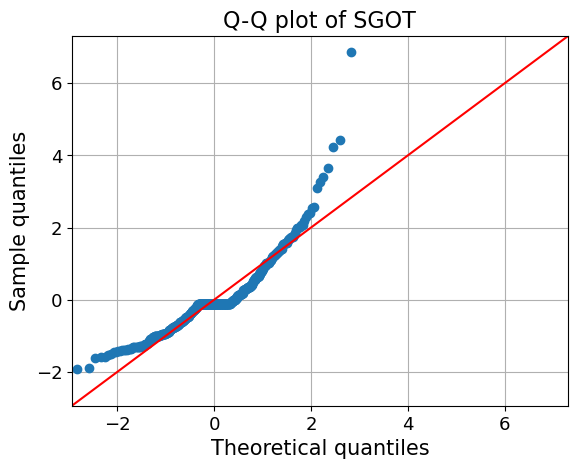

<Figure size 800x500 with 0 Axes>

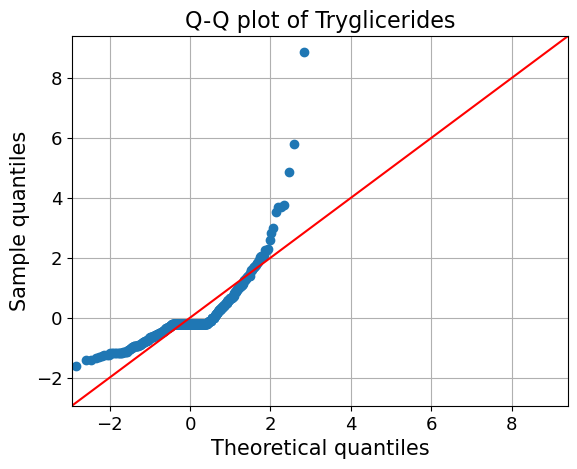

<Figure size 800x500 with 0 Axes>

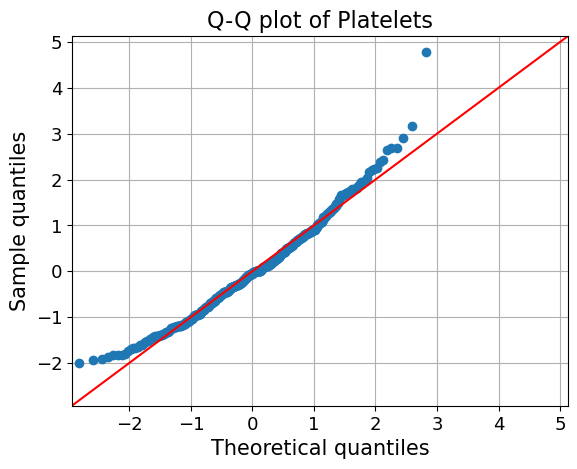

<Figure size 800x500 with 0 Axes>

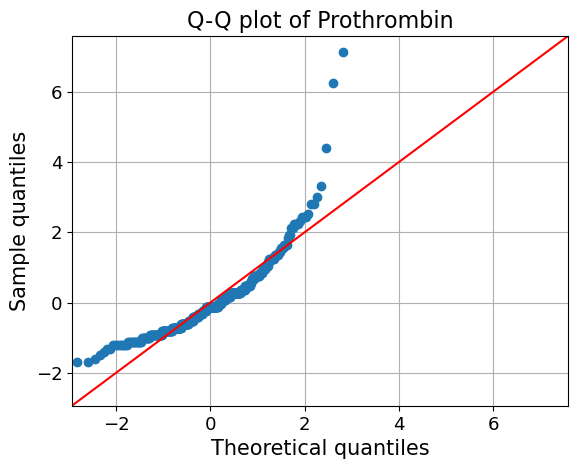

In [10]:
from statsmodels.graphics.gofplots import qqplot

# List of independent numerical variables
numerical_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 
                  'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Generate Q-Q plots for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    fig = qqplot(cl_data[var], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Theoretical quantiles', fontsize=15)
    plt.ylabel('Sample quantiles', fontsize=15)
    plt.title(f'Q-Q plot of {var}', fontsize=16)
    plt.grid(True)
    plt.show()


<Axes: >

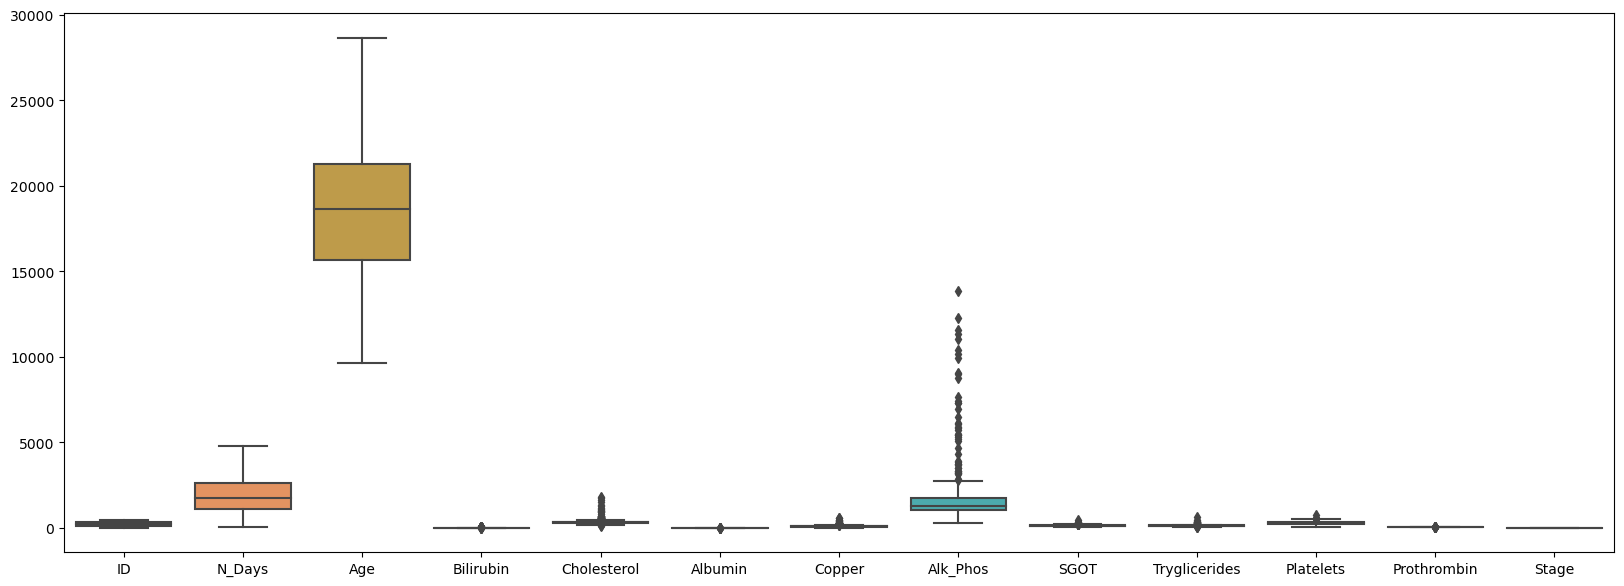

In [11]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=cl_data)

In [12]:
print(cl_data.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')
